In [3]:
!pip install hub

  Using cached s3transfer-0.5.2-py3-none-any.whl (79 kB)
  Using cached jmespath-1.0.0-py3-none-any.whl (23 kB)


In [4]:
import hub
ds = hub.load("hub://activeloop/gtsrb-train")

Opening dataset in read-only mode as you don't have write permissions.
hub://activeloop/gtsrb-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/gtsrb-train


In [6]:
N_CLASSES = 43
RESIZED_IMAGE = (32, 32)

In [17]:
!pip install scikit-image
import matplotlib.pyplot as plt
import glob
from skimage.color import rgb2lab
from skimage.transform import resize
from collections import namedtuple
import numpy as np
np.random.seed(101)
%matplotlib inline

Dataset = namedtuple('Dataset', ['X', 'y'])

def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

def read_dataset_ppm(rootpath, n_labels, resize_to):
  images = []
  labels = []

  for c in range(n_labels):
    full_path = rootpath + '/' + format(c, '05d') + '/'
    for img_name in glob.glob(full_path + "*.ppm"):

      img = plt.imread(img_name).astype(np.float32)
      img = rgb2lab(img / 255.0)[:,:,0]
      if resize_to:
        img = resize(img, resize_to, mode='reflect')

      label = np.zeros((n_labels, ), dtype=np.float32)
      label[c] = 1.0

      images.append(img.astype(np.float32))
      labels.append(label)

  return Dataset(X = to_tf_format(images).astype(np.float32),
                 y = np.matrix(labels).astype(np.float32))

dataset = read_dataset_ppm('C:/Users/inp032/Desktop/유영찬/Git_Hub/Deep-Learning/실전활용 텐서플로 딥러닝 프로젝트/Dataset/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images', N_CLASSES, RESIZED_IMAGE)
print(dataset.X.shape)
print(dataset.y.shape)

(39209, 32, 32, 1)
(39209, 43)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


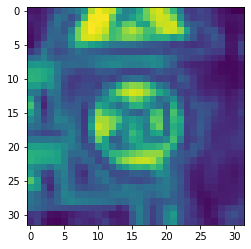

In [18]:
plt.imshow(dataset.X[0, :, :, :].reshape(RESIZED_IMAGE)) #sample
print(dataset.y[0, :]) #label

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


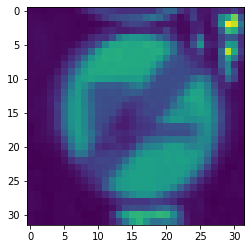

In [19]:
plt.imshow(dataset.X[-1, :, :, :].reshape(RESIZED_IMAGE)) #sample
print(dataset.y[-1, :]) #label

In [20]:
from sklearn.model_selection import train_test_split
idx_train, idx_test = train_test_split(range(dataset.X.shape[0]), test_size=0.25, random_state=101)
X_train = dataset.X[idx_train, :, :, :]
X_test = dataset.X[idx_test, :, :, :]
y_train = dataset.y[idx_train, :]
y_test = dataset.y[idx_test, :]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29406, 32, 32, 1)
(29406, 43)
(9803, 32, 32, 1)
(9803, 43)


In [ ]:
def minibatcher(X, y, batch_size, shuffle):
  assert X.shape[0] == y.shape[0]
  n_samples = X.shape[0]

  if shuffle:
    idx = np.random.permutation(n_samples)
  else:
    idx = list(range(n_samples))

  for k in range(int(np.ceil(n_samples/batch_size))):
    from_idx = k*batch_size
    to_idx = (k+1)*batch_size
    yield X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :]